# Практикалық тапсырмалар (EDA)

### Setup

In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 

In [34]:
df = pd.read_csv("../data/titanic.csv")

### 1. Жеңіл деңгей (Basic)


In [9]:
df.shape

(1309, 28)

In [10]:
df.columns

Index(['Passengerid', 'Age', 'Fare', 'Sex', 'sibsp', 'zero', 'zero.1',
       'zero.2', 'zero.3', 'zero.4', 'zero.5', 'zero.6', 'Parch', 'zero.7',
       'zero.8', 'zero.9', 'zero.10', 'zero.11', 'zero.12', 'zero.13',
       'zero.14', 'Pclass', 'zero.15', 'zero.16', 'Embarked', 'zero.17',
       'zero.18', '2urvived'],
      dtype='object')

In [11]:
df.isnull().sum()

Passengerid    0
Age            0
Fare           0
Sex            0
sibsp          0
zero           0
zero.1         0
zero.2         0
zero.3         0
zero.4         0
zero.5         0
zero.6         0
Parch          0
zero.7         0
zero.8         0
zero.9         0
zero.10        0
zero.11        0
zero.12        0
zero.13        0
zero.14        0
Pclass         0
zero.15        0
zero.16        0
Embarked       2
zero.17        0
zero.18        0
2urvived       0
dtype: int64

In [35]:
cols_to_drop =  [col for col in df.columns if col.startswith('zero')]
df.drop(columns=cols_to_drop, inplace=True)

In [60]:
most_frequent_embarked = df['Embarked'].mode()[0]
df['Embarked'].fillna(most_frequent_embarked, inplace=True)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passengerid  1309 non-null   int64  
 1   Age          1309 non-null   float64
 2   Fare         1309 non-null   float64
 3   Sex          1309 non-null   int64  
 4   sibsp        1309 non-null   int64  
 5   Parch        1309 non-null   int64  
 6   Pclass       1309 non-null   int64  
 7   Embarked     1307 non-null   float64
 8   2urvived     1309 non-null   int64  
dtypes: float64(3), int64(6)
memory usage: 92.2 KB


2. Сандық бағандарды сипаттау


In [18]:
df['Age'].describe()

count    1309.000000
mean       29.503186
std        12.905241
min         0.170000
25%        22.000000
50%        28.000000
75%        35.000000
max        80.000000
Name: Age, dtype: float64

In [19]:
df['Fare'].describe()

count    1309.000000
mean       33.281086
std        51.741500
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: Fare, dtype: float64

3. Гистограмма

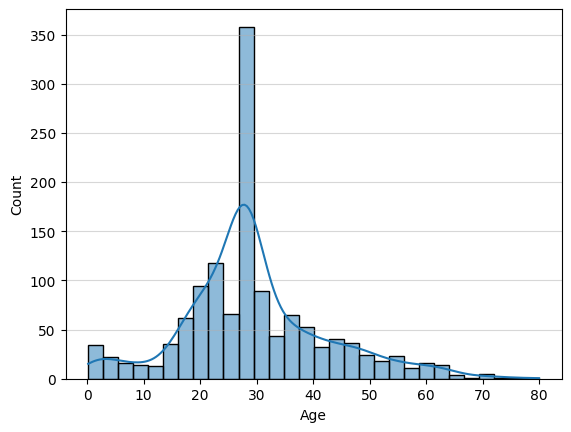

In [28]:
sns.histplot(df['Age'], bins=30, kde=True)
plt.grid(True, alpha=0.5, axis='y')
plt.show()

### 2. Орташа деңгей (Intermediate)


C:\Users\jekim\AppData\Local\Temp\ipykernel_14304\720976715.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df, x='Pclass', y='Fare', palette='viridis')


<Axes: xlabel='Pclass', ylabel='Fare'>

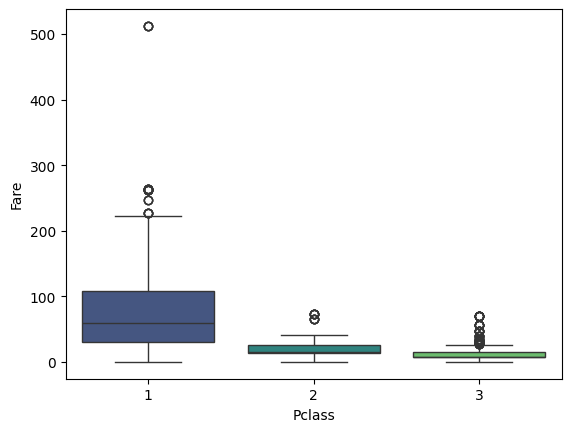

In [42]:
sns.boxplot(data = df, x='Pclass', y='Fare', palette='viridis')

<Axes: xlabel='Age', ylabel='Fare'>

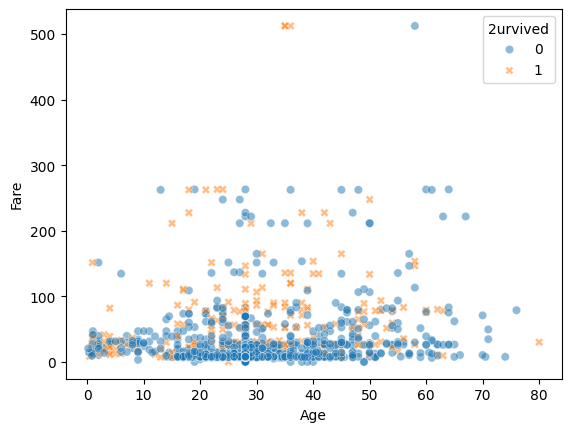

In [54]:
sns.scatterplot(data = df, x='Age', y='Fare', hue='2urvived', style='2urvived', alpha=0.5 )

<Axes: >

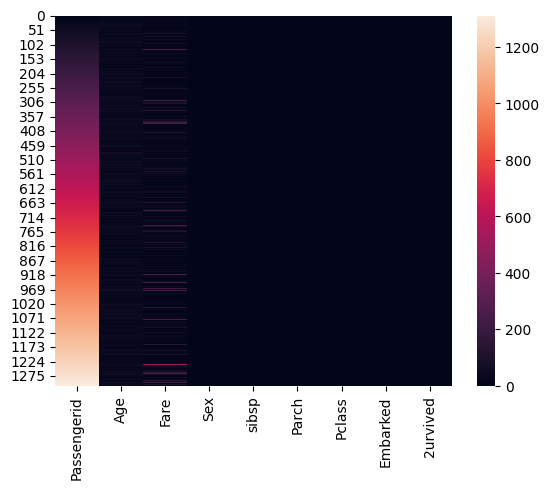

In [55]:
sns.heatmap(data = df)

<Axes: >

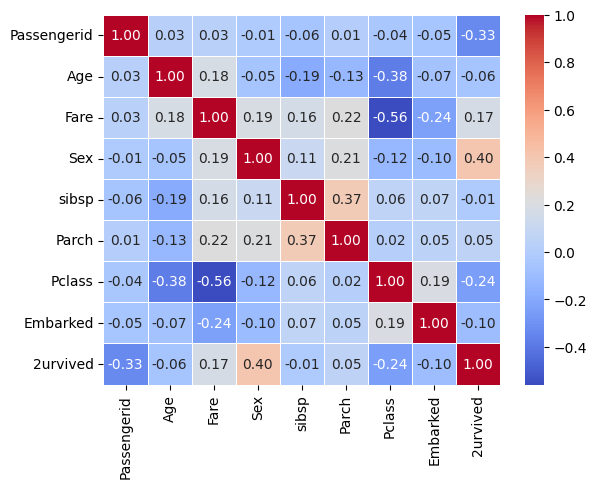

In [59]:
correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, 
            annot=True, # Показать числовые значения корреляции
            cmap='coolwarm', # Цветовая палитра для корреляции (отрицательная-положительная)
            fmt=".2f",      # Формат чисел (2 знака после запятой)
            linewidths=.5   # Линии между ячейками
            )

### 3. Күрделі деңгей (Advanced)
